In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import sys
sys.path.append("../")
from src import pca
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../dat/tracks.csv")
data = data.drop(columns=['Unnamed: 0'])
data.columns

Index(['id', 'name', 'popularity', 'danceability', 'energy', 'liveness',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'tempo',
       'valence', 'key'],
      dtype='object')

# Try PCA

In [3]:
# remove non-continuous and dependent columns and nan rows
data2 = data.dropna()
data_cont = data2.drop(columns=["id", "name", "key", "popularity"])

colnames = data_cont.columns
# turn into np array 
data_np = data_cont.values

In [4]:
colnames

Index(['danceability', 'energy', 'liveness', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'tempo', 'valence'],
      dtype='object')

In [5]:
data.loc[np.flip(np.argsort(data['popularity'])),][:50]

,id,name,popularity,danceability,energy,liveness,loudness,speechiness,acousticness,instrumentalness,tempo,valence,key
0,4fouWK6XVHhzl78KzQ1UjL,abcdefu,100,0.695,0.540,0.3670,-5.692,0.0493,0.29900,0.000000,121.932,0.4150,4.0
4,1r9xUipOqoNwggBpENDsvJ,Enemy (with JID) - from the series Arcane Leag...,98,0.728,0.783,0.4340,-4.424,0.2660,0.23700,0.000000,77.011,0.5550,11.0
52,5HCyWlXZPP0y6Gqq8TgA20,STAY (with Justin Bieber),97,0.591,0.764,0.1030,-5.484,0.0483,0.03830,0.000000,169.928,0.4780,1.0
96,6zSpb8dQRaw0M1dK8PBwQz,Cold Heart - PNAU Remix,96,0.796,0.798,0.0952,-6.312,0.0317,0.03400,0.000042,116.032,0.9420,1.0
145,20on25jryn53hWghthWWW3,Do It To It,96,0.854,0.806,0.0703,-8.262,0.0886,0.02090,0.054200,124.927,0.6370,11.0
55,27NovPIUIRrOZoCHxABJwK,INDUSTRY BABY (feat. Jack Harlow),96,0.736,0.704,0.0501,-7.409,0.0615,0.02030,0.000000,149.995,0.8940,3.0
19,0gplL1WMoJ6iYaPgMCL0gX,Easy On Me,96,0.604,0.366,0.1330,-7.519,0.0282,0.57800,0.000000,141.981,0.1300,5.0
54,3rmo8F54jFF8OgYsqTxm5d,Bad Habits,95,0.807,0.893,0.3660,-3.745,0.0347,0.04510,0.000028,126.011,0.5370,11.0
250,4ZtFanR9U6ndgddUvNcjcG,good 4 u,95,0.563,0.664,0.0849,-5.044,0.1540,0.33500,0.000000,166.928,0.6880,9.0
689,50nfwKoDiSYg8zOCREWAm5,Shivers,95,0.788,0.859,0.0424,-2.724,0.0856,0.28100,0.000000,141.020,0.8220,2.0


In [6]:
df_describe = pd.DataFrame(data_np, columns=colnames)
df_describe.describe().round(2)

,danceability,energy,liveness,loudness,speechiness,acousticness,instrumentalness,tempo,valence
count,28151.00,28151.00,28151.00,28151.00,28151.00,28151.00,28151.00,28151.00,28151.00
mean,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-3.43,-2.54,-1.23,-7.43,-0.99,-0.94,-0.53,-3.99,-1.88
25%,-0.60,-0.61,-0.59,-0.29,-0.68,-0.84,-0.53,-0.82,-0.80
50%,0.14,0.12,-0.42,0.27,-0.48,-0.41,-0.53,-0.03,-0.02
75%,0.75,0.77,0.28,0.62,0.39,0.62,-0.32,0.64,0.78
max,1.97,1.71,5.28,2.44,6.21,2.26,2.51,4.24,2.09


In [7]:
eigenvalues, eigenvectors = pca.PCA(data_np_n)

In [8]:
eigenvalues

array([3.13808047, 1.27314088, 1.05179436, 0.97157426, 0.82177949,
       0.68901621, 0.52898584, 0.36827952, 0.15734897])

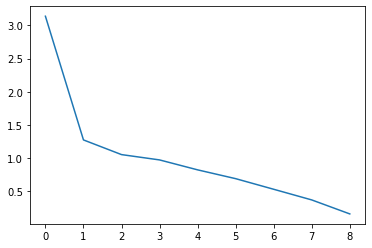

In [9]:
plt.plot(eigenvalues)
plt.show()

In [10]:
data_proj = data_np_n @ eigenvectors[:,:2]

In [11]:
data_np_n.shape

(28151, 9)

## Project eigenvectors into 2D
We just take the first two component loadings of each variable, to see how they determine the data points in 2D.


In [12]:
pc1 = eigenvalues[0] * eigenvectors[:,0]
pc2 = eigenvalues[1] * eigenvectors[:,1]

## Plot data points and eigenvectors

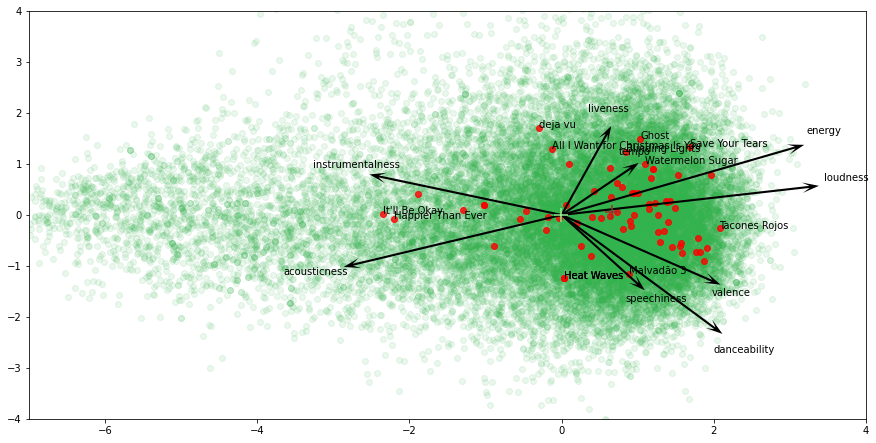

In [39]:
plt.figure(figsize=(15,7.5))
plt.xlim(-7, 4)
plt.ylim(-4, 4)
threshold = 90
pop = data_proj[data2['popularity'] >= threshold,]
non_pop = data_proj[data2['popularity'] < threshold,]
plt.scatter(non_pop[:,0], non_pop[:,1], color=(0.2, 0.7, 0.3, 0.1))

plt.scatter(pop[:,0], pop[:,1], color=(1, 0, 0, 0.8))

num_vecs = pc1.shape[0]
Q = [0] * num_vecs
for i in range(num_vecs):
    Q[i] = plt.quiver(0, 0, pc1[i], pc2[i], scale=5, headwidth=5, headlength=8, width=0.0025)
    plt.text(pc1[i]*2.5-0.4, pc2[i]*3.8, colnames[i])

plt.scatter(*np.mean(non_pop, axis=0), color='lightgreen', marker="+", s=200)
plt.scatter(*np.mean(pop, axis=0), color='brown', marker="+", s=200)
names = data2.loc[data2['popularity'] >= threshold,]["name"]
for i, idx in enumerate(names.index):
    if abs(pop[i,0]) > 2 or abs(pop[i,1]) > 1:
        plt.text(pop[i,0], pop[i,1], names.loc[idx])

# add mahalanobis unit circle per group
plt.show()



In [158]:
np.mean(non_pop, axis=0)

array([-0.00165024, -0.00014772])

(28151, 13)